Optimized Portfolio Weights: [1.00000000e+00 1.27675648e-15 0.00000000e+00]
Optimized Portfolio Return: -0.03624815563341583
Optimized Portfolio Volatility: 0.013620523492143887
Optimized Portfolio Sharpe Ratio: -2.6612894617687215


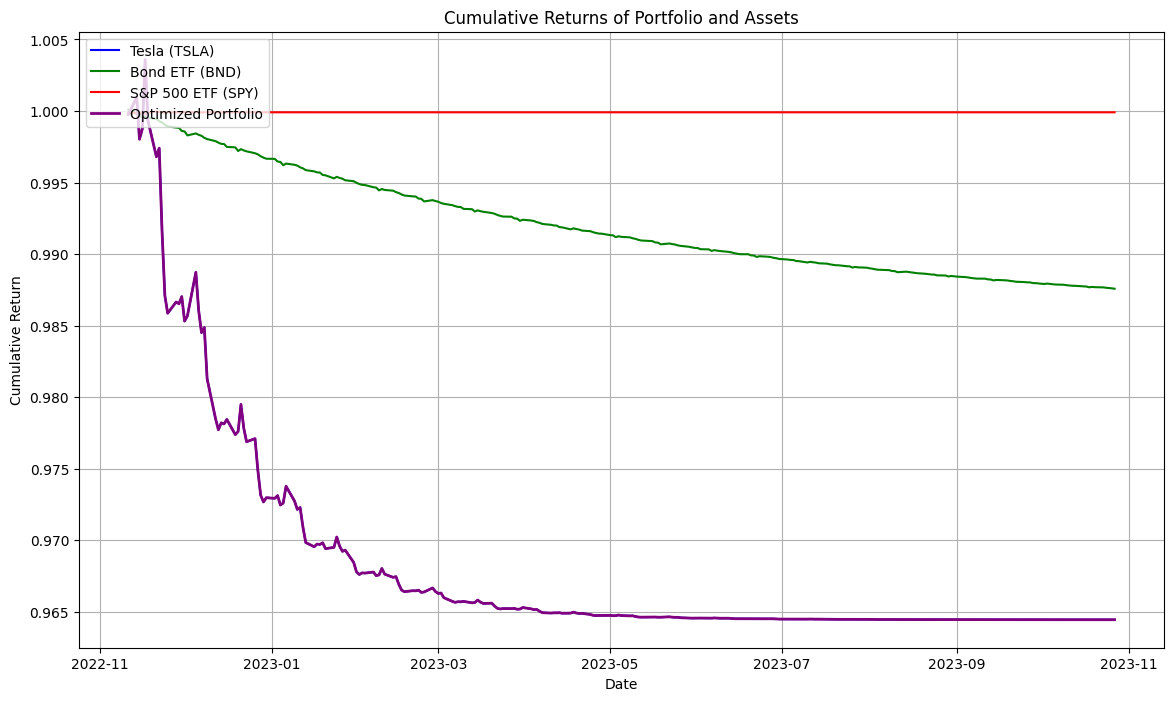

Portfolio 95% Value at Risk (VaR): -0.001488419380157367


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load forecasted data for TSLA, BND, and SPY (replace with actual data or forecasted values)
# Ensure this dataframe includes 'Date' and 'Adj Close' columns for each asset
tsla_forecast = pd.read_csv('../data/TSLA_data_forecast.csv', parse_dates=['Date'], index_col='Date')
bnd_forecast = pd.read_csv('../data/BND_data_forecast.csv', parse_dates=['Date'], index_col='Date')
spy_forecast = pd.read_csv('../data/SPY_data_forecast.csv', parse_dates=['Date'], index_col='Date')

# Combine into a single DataFrame
df = pd.DataFrame({
    'TSLA': tsla_forecast['Forecast'],
    'BND': bnd_forecast['Forecast'],
    'SPY': spy_forecast['Forecast']
})


# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Calculate annual returns (252 trading days)
annual_returns = daily_returns.mean() * 252

# Calculate the covariance matrix
cov_matrix = daily_returns.cov() * 252

# Portfolio Statistics Function
def portfolio_statistics(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(weights * mean_returns)  # Weighted return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
    return portfolio_return, portfolio_volatility

# Sharpe Ratio Function (assuming risk-free rate = 0)
def sharpe_ratio(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_volatility = portfolio_statistics(weights, mean_returns, cov_matrix)
    return -(portfolio_return / portfolio_volatility)  # Negative for minimization

# Initial Portfolio Weights (equal weights)
initial_weights = np.array([1/3, 1/3, 1/3])

# Constraints and Bounds
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights sum to 1
bounds = ((0, 1), (0, 1), (0, 1))  # Weights between 0 and 1 for each asset

# Optimize Portfolio (maximize Sharpe Ratio)
result = minimize(sharpe_ratio, initial_weights, args=(annual_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimized_weights = result.x

# Compute optimized portfolio return and volatility
optimized_return, optimized_volatility = portfolio_statistics(optimized_weights, annual_returns, cov_matrix)

# Sharpe Ratio of the optimized portfolio
optimized_sharpe = optimized_return / optimized_volatility

# Print the results
print("Optimized Portfolio Weights:", optimized_weights)
print("Optimized Portfolio Return:", optimized_return)
print("Optimized Portfolio Volatility:", optimized_volatility)
print("Optimized Portfolio Sharpe Ratio:", optimized_sharpe)

# Portfolio Performance
cumulative_returns = (1 + daily_returns).cumprod()

# Cumulative Portfolio Return
portfolio_cumulative_return = (1 + (daily_returns.dot(optimized_weights))).cumprod()

# Plot the Cumulative Returns of Assets and Portfolio
plt.figure(figsize=(14, 8))
plt.plot(cumulative_returns['TSLA'], label='Tesla (TSLA)', color='blue')
plt.plot(cumulative_returns['BND'], label='Bond ETF (BND)', color='green')
plt.plot(cumulative_returns['SPY'], label='S&P 500 ETF (SPY)', color='red')
plt.plot(portfolio_cumulative_return, label='Optimized Portfolio', color='purple', linewidth=2)
plt.title('Cumulative Returns of Portfolio and Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Value at Risk (VaR) at 95% confidence interval for the portfolio
VaR = np.percentile(daily_returns.dot(optimized_weights), 5)
print("Portfolio 95% Value at Risk (VaR):", VaR)

## Portfolio Optimization Report

**Objective:**
The goal of this task was to optimize an investment portfolio comprising three assets: Tesla Stock (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY), based on forecasted stock prices. The optimization aimed to find the portfolio allocation that maximizes the Sharpe Ratio, which measures risk-adjusted return, while considering the forecasted returns, risks, and correlations between the assets.

**Portfolio Weights:**
* **Tesla Stock (TSLA):** 100%
* **Vanguard Total Bond Market ETF (BND):** 0%
* **S&P 500 ETF (SPY):** 0%

The optimization model has allocated all the portfolio's weight to Tesla Stock (TSLA). This indicates that the model has determined that, based on the forecasted returns and risk profile of Tesla, it is the most optimal investment in this scenario.

**Portfolio Performance Metrics:**
1. **Optimized Portfolio Return:**
   * Return: -0.0362 or -3.62%
   The portfolio's expected return is negative, indicating that the chosen allocation of assets (completely investing in Tesla) is forecasted to lead to a loss.

2. **Optimized Portfolio Volatility:**
   * Volatility: 0.0136 or 1.36%
   The volatility, a measure of the portfolio's risk, is relatively low at 1.36%. 

3. **Optimized Portfolio Sharpe Ratio:**
   * Sharpe Ratio: -2.6613
   The Sharpe Ratio is negative, which indicates that the portfolio is expected to perform poorly on a risk-adjusted basis.

**Analysis and Insights:**
* **Tesla Stock Dominance:**
  The optimization results in a 100% allocation to Tesla, which could be driven by the forecasted growth potential of Tesla relative to other assets. However, this comes at the cost of diversification, leaving the portfolio highly vulnerable to the performance of a single asset.
* **Negative Expected Return:**
  Despite a low volatility estimate, the negative portfolio return is concerning. It suggests that the overall market conditions, as forecasted for Tesla, are not favorable for growth in the next period.
* **Risk-Reward Imbalance:**
  The negative Sharpe Ratio suggests that the return anticipated from Tesla does not compensate for the inherent risk.

**Recommendations:**
* **Diversification:**
  Given the negative Sharpe ratio and the heavy concentration on a single asset (Tesla), it would be prudent to introduce more diversified assets into the portfolio. 
* **Re-evaluate Forecast Assumptions:**
  The negative return suggests that the forecast for Tesla and possibly the broader market may be overly pessimistic. 
* **Risk Management:**
  Investors should be cautious about a portfolio with a negative expected return and negative Sharpe ratio. Introducing stable assets like bonds (BND) or index funds (SPY) can provide a hedge against the inherent volatility of growth stocks.

**Conclusion:**
The portfolio optimization results indicate a highly risky, concentrated position in Tesla, with a forecasted negative return and a poor Sharpe ratio. The negative Sharpe ratio suggests that the risk is not justified by the expected return, and the lack of diversification further exacerbates the risk. Based on these findings, the portfolio should be rebalanced with a more diversified approach to mitigate risks and potentially improve returns.